Programmieren 3 - Verteilung

Peter Rösch, Fakultät für Informatik

Hochschule Augsburg, 2017/2018

# Nachträge und Ergänzungen

## Profiling mit Java

In [ ]:
%%file /tmp/PiMonteCarlo.java

import java.util.Random; 

public class PiMonteCarlo{

    private Random rand;
    private long seed = 8122016;

    public PiMonteCarlo(){
        rand = new Random(seed); 
    }

    private boolean isInUnitCircle(double x, double y){
        return x * x + y * y <= 1.0;
    }

    public double calcPi(long n){
        long hits = 0;
        for (int i=0; i<n; i++){
            double x = this.rand.nextDouble();
            double y = this.rand.nextDouble();
            if (this.isInUnitCircle(x, y))
                    hits++;
        }
        double pi = 4.0 * hits / n;
        return pi;
    }


    public static void main(String[] args){
        long n = Long.valueOf(args[0]);
        PiMonteCarlo aPiMonteCarlo  = new PiMonteCarlo();
        double pi = aPiMonteCarlo.calcPi(n);
        System.out.println("Pi:" + pi);
    }
}


In [ ]:
%%script bash
cd /tmp
javac PiMonteCarlo.java
java -Xrunhprof:cpu=times PiMonteCarlo 100000

Ausschnitt aus der Datei */tmp/java.hprof.txt*

In [ ]:
output="""
CPU TIME (ms) BEGIN (total = 3315) Sat Dec 10 18:41:22 2016
rank   self  accum   count trace method
   1 39.97% 39.97%  400000 301651 java.util.Random.next
   2 19.61% 59.58%  200000 301652 java.util.Random.nextDouble
   3 12.55% 72.13%  400000 301649 java.util.concurrent.atomic.AtomicLong.get
   4 12.31% 84.43%       1 301654 PiMonteCarlo.calcPi
   5 10.98% 95.41%  400000 301650 java.util.concurrent.atomic.AtomicLong.compareAndSet
   6  2.84% 98.25%  100000 301653 PiMonteCarlo.isInUnitCircle
"""

## Profiling mit C

In [ ]:
%%file /tmp/pi_monte_carlo.c

#include <stdio.h>
#include <stdlib.h>

#define SEED 3459387

int is_inside_circle(double x, double y){
    return x * x + y * y <= 1.0;
}

double pi_monte_carlo(unsigned long n){
    srand(SEED);
    unsigned long i, hits=0;
    double x, y;
    for (i=0; i<n; i++){
        x = (double)random() / RAND_MAX;
        y = (double)random() / RAND_MAX;
        if (is_inside_circle(x, y))
            hits++;
    }
    return 4.0 * hits / n;
}

void main(int argc, char **argv){
    unsigned long n = atol(argv[1]);
    double pi_result = pi_monte_carlo(n);
    printf("Result for pi: %g\n", pi_result);
}


In [ ]:
%%script bash
cd /tmp
gcc -pg -o pi_monte_carlo pi_monte_carlo.c
./pi_monte_carlo 100000000
gprof pi_monte_carlo  gmon.out > analysis.txt

Ausschnit aus der Datei */tmp/analysis.txt*

In [ ]:
output = """
Each sample counts as 0.01 seconds.
  %   cumulative   self              self     total           
 time   seconds   seconds    calls   s/call   s/call  name    
 85.57      1.41     1.41         1     1.41     1.64  pi_monte_carlo
 14.06      1.64     0.23 100000000     0.00     0.00  is_inside_circle
"""

## TSP mit cython und prange

* Wie kann man das Problem des Handlungsreisenden auf *prange* abbilden?

In [4]:
staedte_positionen = ((0.010319427306382911, 0.8956251389386756), (0.6999898714299346, 0.42254500074835377), (0.4294574582950912, 0.4568408794115657), (0.6005454852683483, 0.9295407203370832), (0.9590226056623925, 0.581453646599427), (0.748521134122647, 0.5437775417153159), (0.7571232013282426, 0.606435031856663), (0.07528757443413125, 0.07854082131763074), (0.32346175150639334, 0.7291706487873425), (0.012935451483722882, 0.974440252089956), (0.7894689664351368, 0.8925464165283283), (0.5017081207027582, 0.2323298297211428), (0.5994368069089712, 0.006438246252584379), (0.3471372841416518, 0.32362936726486546), (0.9080568556459205, 0.5872162265716462), (0.008216651916432838, 0.5605251786730867), (0.12281649843134745, 0.778836327426156), (0.9698199622470612, 0.9108771425774694), (0.22977122891732482, 0.9692739885317619), (0.8192293086323663, 0.5857981607663957), (0.1422079724040628, 0.8147259475583606), (0.6706795717064135, 0.591561956032189), (0.15756919328106178, 0.6331745919782176), (0.9932745190952539, 0.20429268341528184), (0.21104352892679712, 0.8836996377783977), (0.15162951778287448, 0.43829883402923786), (0.1014198097226855, 0.5877946138306056), (0.8961534561384676, 0.6498866051905969), (0.02348788064910401, 0.2555771312427847), (0.7629752603198586, 0.031097354437254032), (0.9202799257088203, 0.8545409146117934), (0.4740012769258859, 0.30554661789326976), (0.9662984341217945, 0.24235140218349704), (0.236385903920734, 0.8065137287975154), (0.7509340695304845, 0.9276718423781918), (0.891709366337186, 0.9691233497708065), (0.45766675798331646, 0.3966074453757069), (0.362463818656684, 0.629782983287922), (0.3895828182648007, 0.11182372435220689), (0.8007718207811885, 0.07083259575886258), (0.9395297121272306, 0.003549829042441055), (0.9990444201768337, 0.4816092706412669), (0.806664037655748, 0.45636915118812094), (0.7248316046403981, 0.4136143673445848), (0.9797254747122175, 0.5348075095243779), (0.832410347070477, 0.36236092065071435), (0.17697174259486892, 0.09903555437885947), (0.3320429025096797, 0.42538137689172295), (0.010390541304141299, 0.3196764197089256), (0.13647705960093703, 0.6166884292149969), (0.7413967117502017, 0.6758731780971651), (0.5057620560480408, 0.6176726900765315), (0.811221033004999, 0.15436803010778977), (0.5010541138760939, 0.35001152238091926), (0.9413826105193199, 0.9418596542666187), (0.891256361420491, 0.7886584654021789), (0.3676445849723219, 0.9387145658378656), (0.7976904766536591, 0.7297167662430665), (0.5966826978617474, 0.29179542156826277), (0.6209578021367281, 0.22193571777470145), (0.8298034730084203, 0.5164834220744453), (0.1974315640582841, 0.9764209254933037), (0.3181560706032852, 0.9659291942205317), (0.8665674546422951, 0.8281710981528015), (0.341232980616892, 0.5707946637100852), (0.8931358896561539, 0.40864805338293986), (0.26644032823825714, 0.9989727471390323), (0.3993087575662785, 0.009572468741341433), (0.7385521851703551, 0.8947961501854975), (0.3265958212912289, 0.12135269959328665), (0.33657186037515696, 0.04678149607307802), (0.6574688023519235, 0.14620381872693322), (0.9232073321379433, 0.464399378682132), (0.3350568606219765, 0.8140710044746052), (0.43439242705535963, 0.6850627844635814), (0.6748600302251079, 0.17179426903224415), (0.3257145924815924, 0.17892361406234325), (0.9843761318782708, 0.7246387654097534), (0.3302488609623919, 0.5461838792803725), (0.942182061647097, 0.271796972592925), (0.7992439374549364, 0.3344916623897427), (0.07722251160513627, 0.5998378921773792), (0.9551490162437984, 0.99084148343811), (0.2994585617190968, 0.8420506992016424), (0.692980959785355, 0.832838090803397), (0.31555831127132894, 0.06401272570899819), (0.02665227648457802, 0.5242147042171419), (0.1974784428862567, 0.9137326594564479), (0.8486377116437235, 0.773093204292392), (0.6588651068050204, 0.6191834372968826), (0.9294759207447961, 0.04471010558595201), (0.9407045003182903, 0.7240803846820537), (0.6814942236797052, 0.6579517970003296), (0.2956248273119104, 0.4141031496785965), (0.729642956744248, 0.18897087844791205), (0.6092213719795501, 0.12514914017649392), (0.7431271140678826, 0.12660475585183406), (0.9023640654012873, 0.21133242457776658), (0.3513947221768753, 0.10988741056845952), (0.7560785506387285, 0.1994584377393509))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_closed_path(path):
    point_array = np.array(path)
    plt.plot(point_array[0,0], point_array[0,1], 'ro')
    plt.plot(point_array[1:-1,0], point_array[1:-1,1], 'bo')
    plt.plot(point_array[:,0], point_array[:,1], '-k')
    plt.yticks(())
    plt.xticks(())
    plt.show()

In [ ]:
import math
import numpy as np

def distance(p1, p2):
    delta_x = p2[0] - p1[0]
    delta_y = p2[1] - p1[1]
    return math.sqrt(delta_x * delta_x + delta_y * delta_y)

def create_distance_table(point_list):
    n = len(point_list)
    d_table = np.zeros((n, n), dtype=np.float32)
    for i in range(n):
        for k in range(n):
            d_table[i, k] = distance(point_list[i], point_list[k])
    return d_table

In [ ]:
def total_path_len(d_table, path):
    dist = d_table[path[0], path[-1]]
    for i in range(1, len(path)):
        dist += d_table[path[i-1], path[i]]
    return dist

In [ ]:
# source: 
# http://stackoverflow.com/questions/1506078/fast-permutation-number-permutation-mapping-algorithms/1506337#1506337
def perm_k(n, k, offset):
    orig = list(range(offset, n + offset))
    permuted = orig[:]
        
    for i in range(n):
        ind = k % (n - i)
        k = k // (n - i)
        permuted[i] = orig[ind]
        orig[ind] = orig[n - i - 1]
    return permuted

In [ ]:
def shortest_path(positions):
    d_tab = create_distance_table(positions)
    
    n = len(positions)
    
    min_path = [0] + perm_k(n-1, 0, 1)
    min_path_len = total_path_len(d_tab, min_path)
    
    for k in range(1, math.factorial(n-1)):
        path = [0] + perm_k(n-1, k, 1)
        path_len = total_path_len(d_tab, path)
        if path_len < min_path_len:
            min_path_len, min_path = path_len, path
    
    closed_min_path = min_path + min_path[0:1]
    return (min_path_len, 
            np.array(positions, dtype=np.float32)[closed_min_path])

In [ ]:
for i in range(24):
    print(perm_k(4, i, 0))

In [ ]:
path = shortest_path(staedte_positionen[:9])
print(path[0])
plot_closed_path(path[1])

In [ ]:
%timeit shortest_path(staedte_positionen[:9])

## Mit cython und prange

In [1]:
%load_ext Cython

In [2]:
%%cython -f -c-fopenmp --link-args=-fopenmp

import cython
from cython.parallel import prange, threadid
import numpy as np
cimport numpy as np
from cython cimport view

from multiprocessing import cpu_count

from libc.math cimport sqrt

import math

cdef double distance(tuple p1, tuple p2):
    delta_x = p2[0] - p1[0]
    delta_y = p2[1] - p1[1]
    return math.sqrt(delta_x * delta_x + delta_y * delta_y)

@cython.boundscheck(False)
cdef double[:, :] create_distance_table(tuple positions, int n):
    cdef double [:, :] local_table = \
                view.array(shape=(n, n), 
                    itemsize=sizeof(double), format="d")
    cdef int i, j
    cdef tuple p1, p2
    for i, p1 in enumerate(positions[:n]):
        for j, p2 in enumerate(positions[:n]):
            local_table[i, j] = distance(p1, p2)
    return local_table

@cython.boundscheck(False)
cdef double total_path_len(double[:,:] d_table, int[:] path) nogil:
    cdef int i, n
    cdef double dist = d_table[path[0], path[-1]]
    n = path.shape[0]
    for i in range(1, n):
        dist += d_table[path[i-1], path[i]]
    return dist

# source: 
# http://stackoverflow.com/questions/1506078/fast-permutation-number-permutation-mapping-algorithms/1506337#1506337
@cython.boundscheck(False)
@cython.cdivision(True)
cdef void perm_k(int[:] orig, int[:] permuted, long k, int offset=0) nogil:
    cdef int n = orig.shape[0]
    cdef int i
    cdef long ind
    
    for i in range(n):
        orig[i] = i + offset
        
    for i in range(0, n):
        ind = k % (n - i)
        k = k / (n - i)
        permuted[i] = orig[ind]
        orig[ind] = orig[n - i - 1]
        
@cython.boundscheck(False)
@cython.cdivision(True)
cpdef tuple shortest_path_parallel(tuple positions, int n, 
                                   int thread_num = -1):
    cdef double[:, :] d_tab = create_distance_table(positions, n)
    
    if thread_num <= 0:
        thread_num = cpu_count()
        
    # memory views for all threads
    cdef int[:,:] orig = np.zeros((thread_num, n), dtype=np.int32)
    cdef int[:,:] permuted = np.zeros((thread_num, n), dtype=np.int32)
    cdef long long[:] min_k = np.zeros(thread_num, dtype=np.int64)
    cdef double[:] min_len = np.zeros(thread_num, dtype=np.double)
    
    cdef long k, N = math.factorial(n-1)
    
    perm_k(orig[0, 1:], permuted[0, 1:], 0, 1)
    cdef double start_len = total_path_len(d_tab, permuted[0,:])
    for k in range(thread_num):
        min_len[k] = start_len
    cdef int id
    cdef double l
    
    for k in prange(N, num_threads = thread_num, nogil=True, 
                    schedule='guided', chunksize=N//(4*thread_num)):
        id = threadid()
        perm_k(orig[id, 1:], permuted[id, 1:], k, 1)
        l = total_path_len(d_tab, permuted[id, :])
        if l < min_len[id]:
            min_len[id] = l
            min_k[id] = k
    cdef double global_min_len = min_len[0]
    cdef int global_min_index = 0
    for k in range(1, thread_num):
        if min_len[k] <= global_min_len:
            global_min_len = min_len[k]
            global_min_index = min_k[k]
    perm_k(orig[0, 1:], permuted[0, 1:], global_min_index, 1)
    opt_permutation = list(permuted[0, :]) + list(permuted[0, 0:1])
    return (global_min_len, 
            np.array(positions, dtype=np.float32)[opt_permutation])

3.2040912167463054


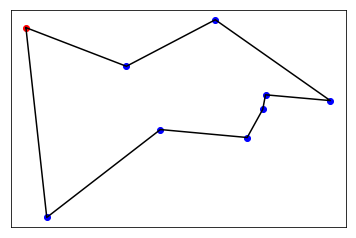

In [8]:
path = shortest_path_parallel(staedte_positionen, 9)
print(path[0])
plot_closed_path(path[1])

In [9]:
%timeit shortest_path_parallel(staedte_positionen, 9)

4.22 ms ± 813 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit shortest_path_parallel(staedte_positionen, 11)

329 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Organisation

**Retro-Computing:** In einem Teil der Vorlesung vom 18.12.2016 werden Sie Gelegenheit haben, einen Apple II Baujahr 1984 in Betrieb zu erleben. Vorgeführt werden neben verschiedenen Programmierumgebungen auch Computerspiele aus dieser Zeit.

# Einführung

Informationen zu verteilten Systemen finden Sie z.B. in den [Safari books online](http://proquest.tech.safaribooksonline.de/search?q=verteilte%20systeme) oder bei Wikipedia: [Verteiltes System](http://de.wikipedia.org/wiki/Verteilte_Systeme), [Verteilte Anwendungen](http://de.wikipedia.org/wiki/Verteilte_Anwendung). 

# Middleware

Auch hier finden Sie Informationen über die [Bibliothek](http://www.hs-augsburg.de/einrichtung/bib/information/or-az/index.html#E-Books) oder im entsprechenden [Wikipedia-Artikel](http://de.wikipedia.org/wiki/Middleware).

Die im Beispiel "Gravitations-Simulation" verwendete Middleware ist *ice* von [zeroc](http://www.zeroc.com). Ice verwendet [*slice*](http://doc.zeroc.com/display/Ice/The+Slice+Language), um Schnittstellen zu definieren.

# Verteilung mit multiprocessing

Mit dem *multiprocessing*-Paket sind nur wenige Änderungen nötig, um eine auf Queues basierende parallelisierte Anwendung auf mehrere Rechner zu verteilen.

Die Queues werden von einem *TaskManager* verwaltet, der auf einem der Rechner im Cluster läuft und über einen bestimmten Port erreichbar ist. Der *TaskManager* kümmert sich um den Zugriff aller Rechner auf die Objekte, die er verwaltet (in diesem Fall zwei Queues).

In [ ]:
%%file /tmp/distributedQueue.py

from __future__ import print_function

from multiprocessing.managers import BaseManager
from multiprocessing import JoinableQueue, Queue

class TaskManager(BaseManager):
    pass

if __name__ == '__main__':
    from sys import argv, exit
    if len(argv) != 2:
        print('usage:', argv[0], b'socket_nr')
        exit(0)
    master_socket = int(argv[1])
    task_queue = JoinableQueue()
    result_queue = Queue()
    TaskManager.register('get_job_queue', 
                         callable = lambda:task_queue)
    TaskManager.register('get_result_queue', 
                         callable = lambda:result_queue)
    m = TaskManager(address = ('', master_socket), 
                    authkey = b'secret')
    print('starting queue server, socket', master_socket)
    m.get_server().serve_forever()

Der Worker muss die IP-Adresse und den Port kennen, unter dem er den *TaskManager* und somit die beiden Queues erreichen kann. Auf jedem Rechner im Cluster sollte ein Worker gestartet werden.

In [ ]:
%%file /tmp/workerTSP.py

from __future__ import print_function

from multiprocessing import cpu_count, Process
from distributedQueue import TaskManager
import math

def __distance(p1, p2):
    delta_x = p2[0] - p1[0]
    delta_y = p2[1] - p1[1]
    return math.sqrt(delta_x * delta_x + delta_y * delta_y)

def __path_length(path):
    total_len = 0.0
    for i in range(1, len(path)):
        total_len += __distance(path[i-1], path[i])
    return total_len

def __shortest_closed_path(path_completed, path_ahead,
        min_length=None, min_path=None):
    if len(path_ahead) == 1:
        # create a closed path by adding the starting point
        total_path = path_completed + path_ahead + (path_completed[0], )
        total_path_length = __path_length(total_path)
        if min_length == None or total_path_length < min_length:
            min_length, min_path = total_path_length, total_path  
    else:
        # continue recursion
        for i in range(len(path_ahead)):
            min_length, min_path = \
                __shortest_closed_path(path_completed + (path_ahead[i], ),
                                       path_ahead[:i] + path_ahead[i+1:],
                                       min_length, min_path)
    return min_length, min_path

def __shortest_closed_path_tuple_call(arg_tupel):
    return __shortest_closed_path(arg_tupel[0], arg_tupel[1])

def __worker_function(job_queue, result_queue):
    while True:
        task = job_queue.get()
        result = __shortest_closed_path_tuple_call(task)
        result_queue.put(result)
        job_queue.task_done()

def __start_workers(m):
    job_queue, result_queue = m.get_job_queue(), m.get_result_queue()
    nr_of_processes = cpu_count()
    processes = [Process(target = __worker_function,
            args = (job_queue, result_queue))
        for i in range(nr_of_processes)]
    for p in processes:
        p.start()
    return nr_of_processes

if __name__ == '__main__':
    from sys import argv, exit
    if len(argv) < 3:
        print('usage:', argv[0], 'server_IP server_socket')
        exit(0)
    server_ip = argv[1]
    server_socket = int(argv[2])
    TaskManager.register('get_job_queue')
    TaskManager.register('get_result_queue')
    m = TaskManager(address=(server_ip, server_socket), authkey = b'secret')
    m.connect()
    nr_of_processes = __start_workers(m)
    print(nr_of_processes, 'workers started')

Der Master füllt die *jobQueue* mit Auftägen und wertet die Ergebnisse, die von den Workern auf die *resultQueue* gelegt wurden, aus. Dazu muss er ebenfalls wissen, wie er den TaskManager finden kann. 

In [ ]:
%%file /tmp/masterTSP.py

from __future__ import print_function

from distributedQueue import TaskManager
import random, math, time

staedte_positionen = ((0.010319427306382911, 0.8956251389386756), (0.6999898714299346, 0.42254500074835377), (0.4294574582950912, 0.4568408794115657), (0.6005454852683483, 0.9295407203370832), (0.9590226056623925, 0.581453646599427), (0.748521134122647, 0.5437775417153159), (0.7571232013282426, 0.606435031856663), (0.07528757443413125, 0.07854082131763074), (0.32346175150639334, 0.7291706487873425), (0.012935451483722882, 0.974440252089956), (0.7894689664351368, 0.8925464165283283), (0.5017081207027582, 0.2323298297211428), (0.5994368069089712, 0.006438246252584379), (0.3471372841416518, 0.32362936726486546), (0.9080568556459205, 0.5872162265716462), (0.008216651916432838, 0.5605251786730867), (0.12281649843134745, 0.778836327426156), (0.9698199622470612, 0.9108771425774694), (0.22977122891732482, 0.9692739885317619), (0.8192293086323663, 0.5857981607663957), (0.1422079724040628, 0.8147259475583606), (0.6706795717064135, 0.591561956032189), (0.15756919328106178, 0.6331745919782176), (0.9932745190952539, 0.20429268341528184), (0.21104352892679712, 0.8836996377783977), (0.15162951778287448, 0.43829883402923786), (0.1014198097226855, 0.5877946138306056), (0.8961534561384676, 0.6498866051905969), (0.02348788064910401, 0.2555771312427847), (0.7629752603198586, 0.031097354437254032), (0.9202799257088203, 0.8545409146117934), (0.4740012769258859, 0.30554661789326976), (0.9662984341217945, 0.24235140218349704), (0.236385903920734, 0.8065137287975154), (0.7509340695304845, 0.9276718423781918), (0.891709366337186, 0.9691233497708065), (0.45766675798331646, 0.3966074453757069), (0.362463818656684, 0.629782983287922), (0.3895828182648007, 0.11182372435220689), (0.8007718207811885, 0.07083259575886258), (0.9395297121272306, 0.003549829042441055), (0.9990444201768337, 0.4816092706412669), (0.806664037655748, 0.45636915118812094), (0.7248316046403981, 0.4136143673445848), (0.9797254747122175, 0.5348075095243779), (0.832410347070477, 0.36236092065071435), (0.17697174259486892, 0.09903555437885947), (0.3320429025096797, 0.42538137689172295), (0.010390541304141299, 0.3196764197089256), (0.13647705960093703, 0.6166884292149969), (0.7413967117502017, 0.6758731780971651), (0.5057620560480408, 0.6176726900765315), (0.811221033004999, 0.15436803010778977), (0.5010541138760939, 0.35001152238091926), (0.9413826105193199, 0.9418596542666187), (0.891256361420491, 0.7886584654021789), (0.3676445849723219, 0.9387145658378656), (0.7976904766536591, 0.7297167662430665), (0.5966826978617474, 0.29179542156826277), (0.6209578021367281, 0.22193571777470145), (0.8298034730084203, 0.5164834220744453), (0.1974315640582841, 0.9764209254933037), (0.3181560706032852, 0.9659291942205317), (0.8665674546422951, 0.8281710981528015), (0.341232980616892, 0.5707946637100852), (0.8931358896561539, 0.40864805338293986), (0.26644032823825714, 0.9989727471390323), (0.3993087575662785, 0.009572468741341433), (0.7385521851703551, 0.8947961501854975), (0.3265958212912289, 0.12135269959328665), (0.33657186037515696, 0.04678149607307802), (0.6574688023519235, 0.14620381872693322), (0.9232073321379433, 0.464399378682132), (0.3350568606219765, 0.8140710044746052), (0.43439242705535963, 0.6850627844635814), (0.6748600302251079, 0.17179426903224415), (0.3257145924815924, 0.17892361406234325), (0.9843761318782708, 0.7246387654097534), (0.3302488609623919, 0.5461838792803725), (0.942182061647097, 0.271796972592925), (0.7992439374549364, 0.3344916623897427), (0.07722251160513627, 0.5998378921773792), (0.9551490162437984, 0.99084148343811), (0.2994585617190968, 0.8420506992016424), (0.692980959785355, 0.832838090803397), (0.31555831127132894, 0.06401272570899819), (0.02665227648457802, 0.5242147042171419), (0.1974784428862567, 0.9137326594564479), (0.8486377116437235, 0.773093204292392), (0.6588651068050204, 0.6191834372968826), (0.9294759207447961, 0.04471010558595201), (0.9407045003182903, 0.7240803846820537), (0.6814942236797052, 0.6579517970003296), (0.2956248273119104, 0.4141031496785965), (0.729642956744248, 0.18897087844791205), (0.6092213719795501, 0.12514914017649392), (0.7431271140678826, 0.12660475585183406), (0.9023640654012873, 0.21133242457776658), (0.3513947221768753, 0.10988741056845952), (0.7560785506387285, 0.1994584377393509))

def __create_argument_list_TSP(path_completed, path_ahead, r_depth, l):
    if len(path_completed) == r_depth:
        l.append((path_completed, path_ahead))
    else:
        for i in range(len(path_ahead)):
            __create_argument_list_TSP(path_completed + (path_ahead[i],) , 
                                       path_ahead[:i] + path_ahead[i+1:], r_depth, l)

def __calculate(m, nr_of_cities):
    job_queue, result_queue = m.get_job_queue(), m.get_result_queue()

    in_list = []
    result_list = []
    __create_argument_list_TSP((staedte_positionen[0], ), 
                            staedte_positionen[1:nr_of_cities], 3, in_list)
    for arg in in_list:
        job_queue.put(arg)
    job_queue.join()
    while not result_queue.empty():
        result_list.append(result_queue.get()) 
    return min(result_list)

if __name__ == '__main__':
    from sys import argv, exit
    if len(argv) != 4:
        print('usage:', argv[0], 'server_IP server_socket nr_of_cities')
        exit(0)
    server_ip = argv[1]
    server_socket = int(argv[2])
    TaskManager.register('get_job_queue')
    TaskManager.register('get_result_queue')
    m = TaskManager(address=(server_ip, server_socket), authkey = b'secret')
    m.connect()

    t1 = time.time()
    result = __calculate(m, int(argv[3]))
    t2 = time.time()
    print(' result: ', result)
    print(' time:   ', t2-t1, ' s\n')

# Verteilung mit IPython

Die Verteilung erfolgt mit den Paket *IPython.parallel*, die Dokumentation finden Sie [hier](http://ipython.org/ipython-doc/stable/parallel/parallel_intro.html)

Zunächst benötigen wir wieder die Städte-Positionen ...

Folgende Schritte sind nötig, um ein Cluster mit IPython und python3 auf den Rechnern im Labor (Linux) aufzusetzen:
 1. Auswahl eines Ports, z.B. 45678, Platzhalter PORT
 1. Feststellen der IP-Adresse, auf dem der *ipcontroller3* laufen soll z.B. mit 
            hostname -I
   Platzhalter ist IP
 1. Auf einem Rechner muss der Controller gestartet werden mit
          ipcontroller --ip=IP --port=PORT
 Dabei werden die Dateien *ipcontroller-client.json* und *ipcontroller-engine.json* im Verzeichnis *~/.ipython/profile_default/security* erzeugt, die von den Engines und dem Notebook, das das Cluster nutzt, benötigt werden.
 1. Jetzt können Sie sich *mit der selben Benutzerkennung* auf anderen Rechnern anmelden und Engines starten mit
          ipengine&
  Sie können natürlich mehrere Engines pro Rechner starten.
 1. Starten Sie den Jupyter-Server, *wieder mit der gleichen Benutzerkennung*, durch Eingabe von 
         jupyter-notebook
         
Falls sich die beteiligten Rechner *nicht* das Verzeichnis *~/.ipython* teilen, müssen Sie die Dateien *ipcontroller-client.json* und *ipcontroller-engine.json* aus dem Verzeichnis *~/.ipython/profile_default/security* des Rechners, auf dem der Controller läuft, in das entsprechende Verzeichnis jedes Rechners kopieren, der für das Cluster rechnet bzw. das Cluster nutzen soll. **Dieser Schritt muss wiederholt werden, sobald der Controller neu gestartet wird.** Details finden Sie in der [Dokumentation](http://ipython.org/ipython-doc/stable/parallel/parallel_intro.html).

In [ ]:
staedte_positionen = ((0.010319427306382911, 0.8956251389386756), (0.6999898714299346, 0.42254500074835377), (0.4294574582950912, 0.4568408794115657), (0.6005454852683483, 0.9295407203370832), (0.9590226056623925, 0.581453646599427), (0.748521134122647, 0.5437775417153159), (0.7571232013282426, 0.606435031856663), (0.07528757443413125, 0.07854082131763074), (0.32346175150639334, 0.7291706487873425), (0.012935451483722882, 0.974440252089956), (0.7894689664351368, 0.8925464165283283), (0.5017081207027582, 0.2323298297211428), (0.5994368069089712, 0.006438246252584379), (0.3471372841416518, 0.32362936726486546), (0.9080568556459205, 0.5872162265716462), (0.008216651916432838, 0.5605251786730867), (0.12281649843134745, 0.778836327426156), (0.9698199622470612, 0.9108771425774694), (0.22977122891732482, 0.9692739885317619), (0.8192293086323663, 0.5857981607663957), (0.1422079724040628, 0.8147259475583606), (0.6706795717064135, 0.591561956032189), (0.15756919328106178, 0.6331745919782176), (0.9932745190952539, 0.20429268341528184), (0.21104352892679712, 0.8836996377783977), (0.15162951778287448, 0.43829883402923786), (0.1014198097226855, 0.5877946138306056), (0.8961534561384676, 0.6498866051905969), (0.02348788064910401, 0.2555771312427847), (0.7629752603198586, 0.031097354437254032), (0.9202799257088203, 0.8545409146117934), (0.4740012769258859, 0.30554661789326976), (0.9662984341217945, 0.24235140218349704), (0.236385903920734, 0.8065137287975154), (0.7509340695304845, 0.9276718423781918), (0.891709366337186, 0.9691233497708065), (0.45766675798331646, 0.3966074453757069), (0.362463818656684, 0.629782983287922), (0.3895828182648007, 0.11182372435220689), (0.8007718207811885, 0.07083259575886258), (0.9395297121272306, 0.003549829042441055), (0.9990444201768337, 0.4816092706412669), (0.806664037655748, 0.45636915118812094), (0.7248316046403981, 0.4136143673445848), (0.9797254747122175, 0.5348075095243779), (0.832410347070477, 0.36236092065071435), (0.17697174259486892, 0.09903555437885947), (0.3320429025096797, 0.42538137689172295), (0.010390541304141299, 0.3196764197089256), (0.13647705960093703, 0.6166884292149969), (0.7413967117502017, 0.6758731780971651), (0.5057620560480408, 0.6176726900765315), (0.811221033004999, 0.15436803010778977), (0.5010541138760939, 0.35001152238091926), (0.9413826105193199, 0.9418596542666187), (0.891256361420491, 0.7886584654021789), (0.3676445849723219, 0.9387145658378656), (0.7976904766536591, 0.7297167662430665), (0.5966826978617474, 0.29179542156826277), (0.6209578021367281, 0.22193571777470145), (0.8298034730084203, 0.5164834220744453), (0.1974315640582841, 0.9764209254933037), (0.3181560706032852, 0.9659291942205317), (0.8665674546422951, 0.8281710981528015), (0.341232980616892, 0.5707946637100852), (0.8931358896561539, 0.40864805338293986), (0.26644032823825714, 0.9989727471390323), (0.3993087575662785, 0.009572468741341433), (0.7385521851703551, 0.8947961501854975), (0.3265958212912289, 0.12135269959328665), (0.33657186037515696, 0.04678149607307802), (0.6574688023519235, 0.14620381872693322), (0.9232073321379433, 0.464399378682132), (0.3350568606219765, 0.8140710044746052), (0.43439242705535963, 0.6850627844635814), (0.6748600302251079, 0.17179426903224415), (0.3257145924815924, 0.17892361406234325), (0.9843761318782708, 0.7246387654097534), (0.3302488609623919, 0.5461838792803725), (0.942182061647097, 0.271796972592925), (0.7992439374549364, 0.3344916623897427), (0.07722251160513627, 0.5998378921773792), (0.9551490162437984, 0.99084148343811), (0.2994585617190968, 0.8420506992016424), (0.692980959785355, 0.832838090803397), (0.31555831127132894, 0.06401272570899819), (0.02665227648457802, 0.5242147042171419), (0.1974784428862567, 0.9137326594564479), (0.8486377116437235, 0.773093204292392), (0.6588651068050204, 0.6191834372968826), (0.9294759207447961, 0.04471010558595201), (0.9407045003182903, 0.7240803846820537), (0.6814942236797052, 0.6579517970003296), (0.2956248273119104, 0.4141031496785965), (0.729642956744248, 0.18897087844791205), (0.6092213719795501, 0.12514914017649392), (0.7431271140678826, 0.12660475585183406), (0.9023640654012873, 0.21133242457776658), (0.3513947221768753, 0.10988741056845952), (0.7560785506387285, 0.1994584377393509))

Der Befehl *Client* gibt eine Liste aller Engines zurück, die Teil des Clusters sind. Falls kein Argument übergeben wird, werden lokale Engines, die z.B. über den Reiter *Clusters* dex *IPython Dashboards* gestartet werden, verwendet.

Wird dagegen der Name einer Datei übergeben, so werden die Verbindungs-Daten zum *ipcontroller* aus dieser Datei gelesen (siehe unten).

In [ ]:
from ipyparallel import Client

In [ ]:
c = None
def setup_client(client_arg = None):
    global c
    if client_arg:
        c = Client(client_arg)
    else:
        c = Client()
    print('Nr of Engines:', len(c))

Die folgende Funktion verwendet eine *load_balanced_view*, um den Algorithmus zum TSP verteilt im Cluster auszuführen.

In [ ]:
def TSP_IPython_cluster(path_completed, path_ahead, r_depth):

    def __shortest_closed_path_tuple_call(arg_tupel):
        return __shortest_closed_path(arg_tupel[0], arg_tupel[1])
    
    
    def __create_argument_list_TSP(path_completed, path_ahead, r_depth, l):
        if len(path_completed) == r_depth:
            l.append((path_completed, path_ahead))
        else:
            for i in range(len(path_ahead)):
                __create_argument_list_TSP(path_completed + (path_ahead[i],) , 
                                       path_ahead[:i] + path_ahead[i+1:], r_depth, l)
    l_in = []
    __create_argument_list_TSP(path_completed, path_ahead, r_depth, l_in)
    #
    # Load-Balanced view (fuer Cluster)
    lview = c.load_balanced_view()
    lOut = lview.map_sync(__shortest_closed_path_tuple_call, l_in)
    return min(lOut)

Bevor die nächsten Zeilen funktionieren, müssen erst einige Engines und ggf. ein Controller gestartet werden.

In [ ]:
setup_client(None)
nr_of_cities = 10

r_depth = 2

Das magische Kommando *%%px* bewirkt, das der Inhalt der Zelle auf allen Engines ausgeführt wird.

In [ ]:
%%px

import math

def __distance(p1, p2):
    delta_x = p2[0] - p1[0]
    delta_y = p2[1] - p1[1]
    return math.sqrt(delta_x * delta_x + delta_y * delta_y)

def __path_length(path):
    total_len = 0.0
    for i in range(1, len(path)):
        total_len += __distance(path[i-1], path[i])
    return total_len

def __shortest_closed_path(path_completed, path_ahead,
        min_length=None, min_path=None):
    if len(path_ahead) == 1:
        # create a closed path by adding the starting point
        total_path = path_completed + path_ahead + (path_completed[0], )
        total_path_length = __path_length(total_path)
        if min_length == None or total_path_length < min_length:
            min_length, min_path = total_path_length, total_path  
    else:
        # continue recursion
        for i in range(len(path_ahead)):
            min_length, min_path = \
                __shortest_closed_path(path_completed + (path_ahead[i], ),
                                       path_ahead[:i] + path_ahead[i+1:],
                                       min_length, min_path)
    return min_length, min_path

Jetzt kann der TSP-Algorithmus im Cluster ausgeführt werden:

In [ ]:
%%timeit
TSP_IPython_cluster((staedte_positionen[0], ), staedte_positionen[1:nr_of_cities], r_depth)

Zu Test-Zwecken kann auch ein lokales Cluster genutzt werden. Dann brauchen Sie weder Controller noch Engines Manuell zu starten. Ein lokales Cluster starten Sie vom Browser-Tab *IPy Home, Clusters*.

# Aufgaben bis 21.12.2017

## Aufgaben: Einführung

1. Mit welchen verteilten Systemen hatten Sie schon zu tun? (Liste)
1. Warum finden sich an der Spitze der [Top 500 Supercomputer](http://www.top500.org) hauptsächlich Cluster?
1. Gilt das Amdahlsche Gesetz auch für Berechnungen im Cluster? (Begründung)
1. Überlegen Sie sich (Papier/Bleistift), wie Sie Ihre Gravitations-Simulation in einem Cluster rechnen können. Betrachten Sie dabei insbesondere folgende Aspekte:
    1. Welche Gründe sprechen dafür, die Berechnung in einem Cluster durchzuführen?
    1. Welche Daten müssen zwischen den beteiligten Rechnern mindestens ausgetauscht werden?
    1. Stellen Sie den Fluß der Daten in einem Diagramm dar (Von wo nach wo fließen welche Daten in welcher zeitlichen Abfolge?).
    1. Welche zusätzlichen Herausforderungen stellen sich für eine verteilte Berechnung im Vergleich zur Parallelisierung mit *multiprocessing.map*?

## Aufgaben: Middleware

1. Vergegenwärtigen Sie sich nochmals die Struktur und Funktionsweise der im Rahmen der Vorlesung vorgestellten verteilten Gravitations-Simulation, die [Ice](http://www.zeroc.com) verwendet.
1. Nennen und beschreiben Sie zwei wichtige Vorteile, die Entwickler durch den Einsatz einer Middleware haben? (ca. vier Sätze)
1. Was leistet die Middleware *ice* von [zeroc](https://zeroc.com)? (ca. fünf Sätze)
1. Wozu wird [*slice*](http://doc.zeroc.com/display/Ice/The+Slice+Language) benötigt? (ca. vier Sätze)
1. Welche Gründe sprechen *gegen* den Einsatz von Middleware in kleineren Projekten? (ca. vier Sätze)


## Aufgaben: Verteilung mit multiprocessing

1. Diskutieren Sie mit anderen Studierenden die Funktionsweise des angegebenen Beispiels.
1. Welche Gemeinsamkeiten und Unterschiede bestehen zwischen der in der letzten Vorlesung vorgestellten Parallelisierung mittels *Joinable Queues* und der oben angegebenen Verteilung mittels der Klasse *distributed Queue*?
1. Verwenden Sie die angegebenen Python-Klassen und -Funktionen als Vorlage und implementieren Sie eine verteilte Version Ihrer Monte Carlo-Simulation zur Berechnung der Zahl $\pi$. 
1. Bauen Sie mit den Rechnern im Labor M3.03 ein Cluster auf und messen Sie die Beschleunigungen, die Sie für die beiden Beispiele "TSP" und "Monte Carlo-Simulation zur Berechnung der Zahl $\pi$" mit *multiprocessing* erreicht haben.

## Aufgaben: Verteilung mit IPython

1. Welche Aufgaben, um die Sie sich mit *multiprocessing* selbst kümmern müssen, werden Ihnen von *IPython.parallel* abgenommen?
1. Verteilen Sie Ihre Monte Carlo-Simulation unter Verwendung des Pakets *IPython.parallel*. Verwenden Sie dabei die gegebene Anwendung zum TSP als Vorlage.
1. Bauen Sie mit den Rechnern im Labor M3.03 ein Cluster auf und messen Sie die Beschleunigungen, die Sie für die beiden Beispiele "TSP" und "Monte Carlo-Simulation zur Berechnung der Zahl $\pi$" mit *Ipython.parallel* erreicht haben. Vergleichen Sie Ihre Ergebnisse mit denen aus der entsprechenden Aufgabe zum Thema "Multiprocessing".
1. Verschaffen Sie sich anhand der [Dokumentation](http://ipython.org/ipython-doc/stable/parallel/parallel_intro.html) einen Überblick über die Möglichkeiten, die Ihnen das Paket *Ipython.parallel* bietet.

# Überprüfung

1. Was bedeutet der Begriff "Remote Procedure Call" (RPC)? (max. drei Sätze)
1. Sie wollen eine Berechnung, die Sie auf einem Rechner mit *multiprocessing* parallelisiert haben, auf mehrere Rechner verteilen. Auf welche Faktoren müssen Sie achten, damit die Verteilung zu einer Verkürzung der Rechenzeit führt? (ca. vier Sätze)
1. Was bedeutet der Begriff Lastverteilung ("load balancing")? (max. fünf Sätze)
1. Geben Sie ein Beispiel für ein parallelisierbares Problem, das sich *nicht* für eine Verteilung auf mehrere Rechner eignet. (ca. vier Sätze)
1. Geben Sie ein Beispiel an, in dem eine Kombination der Parallelisierung mit *cython* und der Verteilung mit *IPython* sinnvoll ist.